In [1]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

ModuleNotFoundError: No module named 'scipy'

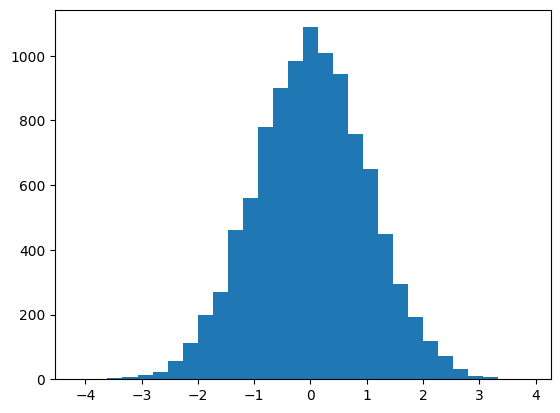

In [3]:
sample = normal(size=10000)
pyplot.hist(sample, bins=30)
pyplot.show()

# **Estimación paramétrica**

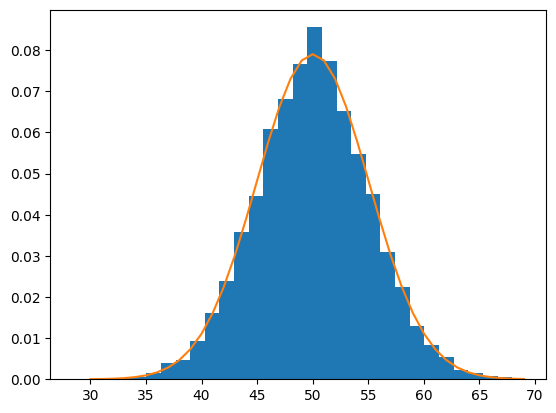

In [6]:
sample = normal(loc=50, scale=5, size=10000)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins = 30, density = True)
pyplot.plot(values, probabilidades)
pyplot.show()

# **Estimación no paramétrica**

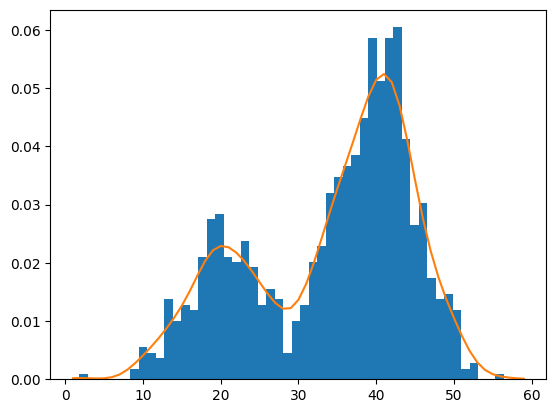

In [14]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # probabilidades logarítmicas
probabilities = np.exp(probabilities) # inversión de probabilidad

pyplot.hist(sample, bins = 50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()